In [67]:
from keras.datasets import boston_housing
from keras import models
from keras import layers
import numpy as np

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [68]:
train_data.shape

(404, 13)

In [69]:
test_data.shape

(102, 13)

In [70]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [71]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [72]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
    

In [73]:
train_data.shape[1]

13

In [74]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(                                     
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()                                                    
    model.fit(partial_train_data, partial_train_targets,                     
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)      
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [75]:
print(all_scores)
print(np.mean(all_scores))

[2.0980656666330773, 2.1075122663290196, 2.848475527055193, 2.370204036778743]
2.356064374199008


In [76]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(                                     
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()                                                    
    history = model.fit(partial_train_data, partial_train_targets,           
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [77]:
print(all_mae_histories)

[[3.835150690362005, 2.7898491868878357, 2.596461796524501, 2.345317840576172, 2.416455174436664, 2.425774347664106, 2.2684172545329178, 2.273460765876392, 2.170360234704348, 2.321807615827806, 2.1037102595414265, 2.3118222869268736, 2.1178900841439123, 1.9720954234057133, 1.9389553447761159, 2.1385848970696477, 2.045788028452656, 1.901380708902189, 2.2518338496142096, 2.0915353369004657, 1.8820244439757696, 1.8815666850250545, 1.8271904605450016, 1.8755008300932328, 1.9519856707884533, 1.9369497960156734, 1.8750354181421864, 1.8308211033887203, 1.8513012451700646, 2.2039764328758316, 2.0524239776158097, 2.2665281956738763, 2.195813207343073, 2.110074241562645, 1.9926263979165861, 1.9960402120458018, 2.3952332581623947, 1.8216262902363691, 1.8457558273088814, 2.079968485501733, 1.9565127769319137, 1.955840016355609, 2.0391852407172175, 1.9449133164811843, 1.8839789900449242, 2.1015854542798333, 2.1083575286487544, 1.8619293363967744, 2.0394410709343336, 1.893789541603315, 1.88896778786

In [78]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

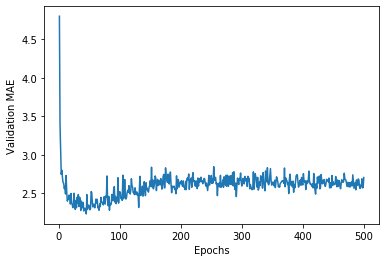

In [85]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [82]:
print(average_mae_history[0:10])
print(average_mae_history[10:20])

[4.796260101960437, 3.3882256663671813, 3.0612614095801174, 2.747642820424373, 2.7998081823386767, 2.7024174432943364, 2.63962187507365, 2.6320607886456027, 2.562369836439, 2.592243265397478]
[2.4926514495717416, 2.7325862244804306, 2.515693686976291, 2.399804412728489, 2.432272398825919, 2.423701842232506, 2.479045126697805, 2.4441345422574785, 2.362239981641864, 2.4985346947566116]


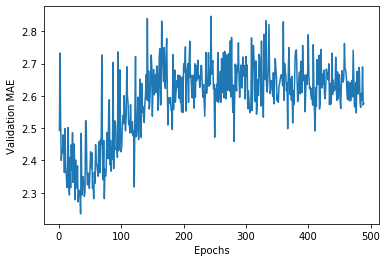

In [84]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history[10:-1]) + 1), average_mae_history[10:-1])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

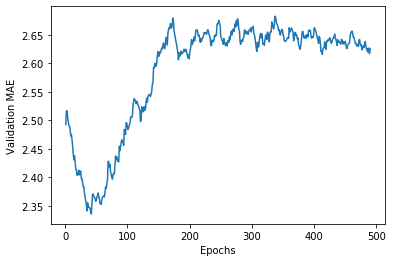

In [88]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
      
    else:
      smoothed_points.append(point)
  
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [90]:
smooth_mae_history

[2.4926514495717416,
 2.5166449270626106,
 2.516549803053979,
 2.50487526402143,
 2.497614977501879,
 2.490223663974942,
 2.4891058102472283,
 2.4846086834482533,
 2.4723718132676145,
 2.474988101416514,
 2.4658227083222313,
 2.4547052549525894,
 2.4408289074493674,
 2.4307446274181252,
 2.437860170828551,
 2.4273558815742975,
 2.4139037537128942,
 2.4134362928017588,
 2.4036265237376293,
 2.408090354382194,
 2.404234099322901,
 2.4123916993167933,
 2.4043354135919803,
 2.409023467289713,
 2.4108426718043634,
 2.39758577195801,
 2.397936324705679,
 2.3911844376003675,
 2.383457845223011,
 2.3834209755179154,
 2.3722269036629444,
 2.3651771538246886,
 2.3594432958916665,
 2.3527216653875844,
 2.340883277158412,
 2.3552020476508946,
 2.3489493719815586,
 2.3470055094449975,
 2.347260342854098,
 2.3449999301911704,
 2.3393397593888423,
 2.3357264761024807,
 2.3545199294078203,
 2.370318959825676,
 2.3703697722561663,
 2.3657703454619803,
 2.3653153076513647,
 2.3628331290930342,
 2.357897

In [91]:
smooth_mae_history[:80]

[2.4926514495717416,
 2.5166449270626106,
 2.516549803053979,
 2.50487526402143,
 2.497614977501879,
 2.490223663974942,
 2.4891058102472283,
 2.4846086834482533,
 2.4723718132676145,
 2.474988101416514,
 2.4658227083222313,
 2.4547052549525894,
 2.4408289074493674,
 2.4307446274181252,
 2.437860170828551,
 2.4273558815742975,
 2.4139037537128942,
 2.4134362928017588,
 2.4036265237376293,
 2.408090354382194,
 2.404234099322901,
 2.4123916993167933,
 2.4043354135919803,
 2.409023467289713,
 2.4108426718043634,
 2.39758577195801,
 2.397936324705679,
 2.3911844376003675,
 2.383457845223011,
 2.3834209755179154,
 2.3722269036629444,
 2.3651771538246886,
 2.3594432958916665,
 2.3527216653875844,
 2.340883277158412,
 2.3552020476508946,
 2.3489493719815586,
 2.3470055094449975,
 2.347260342854098,
 2.3449999301911704,
 2.3393397593888423,
 2.3357264761024807,
 2.3545199294078203,
 2.370318959825676,
 2.3703697722561663,
 2.3657703454619803,
 2.3653153076513647,
 2.3628331290930342,
 2.357897

In [94]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 2ms/step


In [95]:
test_mae_score

2.675027146058924